# Zipf's Law Analysis: Large Headlines Dataset

This notebook analyzes word frequency distributions in the large headlines dataset (25,000 headlines) and tests adherence to Zipf's law.

## What is Zipf's Law?

Zipf's law is an empirical observation about word frequencies in natural language. It states that:

**The frequency of any word is inversely proportional to its rank in the frequency table.**

Mathematically: **f(r) = C / r^α**

Where:
- f(r) = frequency of word at rank r
- C = constant (coefficient)
- α = exponent (ideally ≈ 1.0 for natural language)
- r = rank (1 for most frequent, 2 for second most frequent, etc.)

In **ideal Zipf's law**, α = 1.0, meaning:
- The 2nd most frequent word appears half as often as the 1st
- The 3rd most frequent word appears one-third as often as the 1st
- And so on...

## Why Does Zipf's Law Matter?

1. **Linguistic universality:** Appears across many languages
2. **Information theory:** Related to optimal communication efficiency
3. **NLP applications:** Informs stopword identification, vocabulary size estimation
4. **Data quality:** Deviations can indicate synthetic or unusual text

## 1. Setup and Data Loading

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LinearRegression

# Set visualization style
plt.style.use('ggplot')
%matplotlib inline

# Set figure size default
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
# Load large headlines dataset
df = pd.read_csv('news_headlines_large.csv')

print(f"Dataset loaded successfully!")
print(f"Total headlines: {len(df):,}")
print(f"\nFirst 5 headlines:")
print(df[['headline', 'category']].head())

In [3]:
# Basic dataset statistics
print("Dataset Statistics:")
print("=" * 50)
print(f"Total headlines: {len(df):,}")
print(f"Total words: {df['word_count'].sum():,}")
print(f"Average words per headline: {df['word_count'].mean():.2f}")
print(f"\nCategory distribution:")
print(df['category'].value_counts().sort_index())

Dataset Statistics:
Total headlines: 10,000
Total words: 70,381
Average words per headline: 7.04

Category distribution:
category
Entertainment    2500
Politics         2500
Sports           2500
Technology       2500
Name: count, dtype: int64


## 2. Word Frequency Analysis

In [4]:
# Combine all headlines and tokenize
all_text = ' '.join(df['headline'].str.lower())
all_words = all_text.split()

print(f"Total word tokens: {len(all_words):,}")
print(f"Total characters: {len(all_text):,}")

Total word tokens: 70,381
Total characters: 511,725


In [5]:
# Count word frequencies
word_counts = Counter(all_words)
all_word_freq = word_counts.most_common()

print(f"Unique words (vocabulary size): {len(word_counts):,}")
print(f"Type-token ratio: {len(word_counts) / len(all_words):.4f}")
print(f"\nTop 20 most frequent words:")
print("=" * 50)
for i, (word, freq) in enumerate(all_word_freq[:20], 1):
    print(f"{i:2d}. '{word}': {freq:,}")

Unique words (vocabulary size): 937
Type-token ratio: 0.0133

Top 20 most frequent words:
 1. 'for': 1,500
 2. 'with': 1,278
 3. 'to': 1,154
 4. 'in': 1,059
 5. 'new': 906
 6. 'on': 860
 7. 'million': 597
 8. 'of': 531
 9. 'the': 512
10. 'after': 486
11. 'and': 425
12. 'over': 419
13. 'computing': 371
14. 'season': 366
15. 'as': 339
16. 'victory': 308
17. 'reality': 306
18. 'from': 274
19. 'president': 273
20. 'record': 263


## 3. Prepare Data for Zipf's Law Analysis

In [6]:
# Extract ranks and frequencies
ranks = list(range(1, len(all_word_freq) + 1))
frequencies = [freq for word, freq in all_word_freq]

print(f"Data prepared for {len(ranks)} words")
print(f"Rank 1 (most frequent): {frequencies[0]} occurrences")
print(f"Rank {len(ranks)} (least frequent): {frequencies[-1]} occurrence(s)")

Data prepared for 937 words
Rank 1 (most frequent): 1500 occurrences
Rank 937 (least frequent): 1 occurrence(s)


## 4. Visual Exploration: Linear vs Log-Log Plots

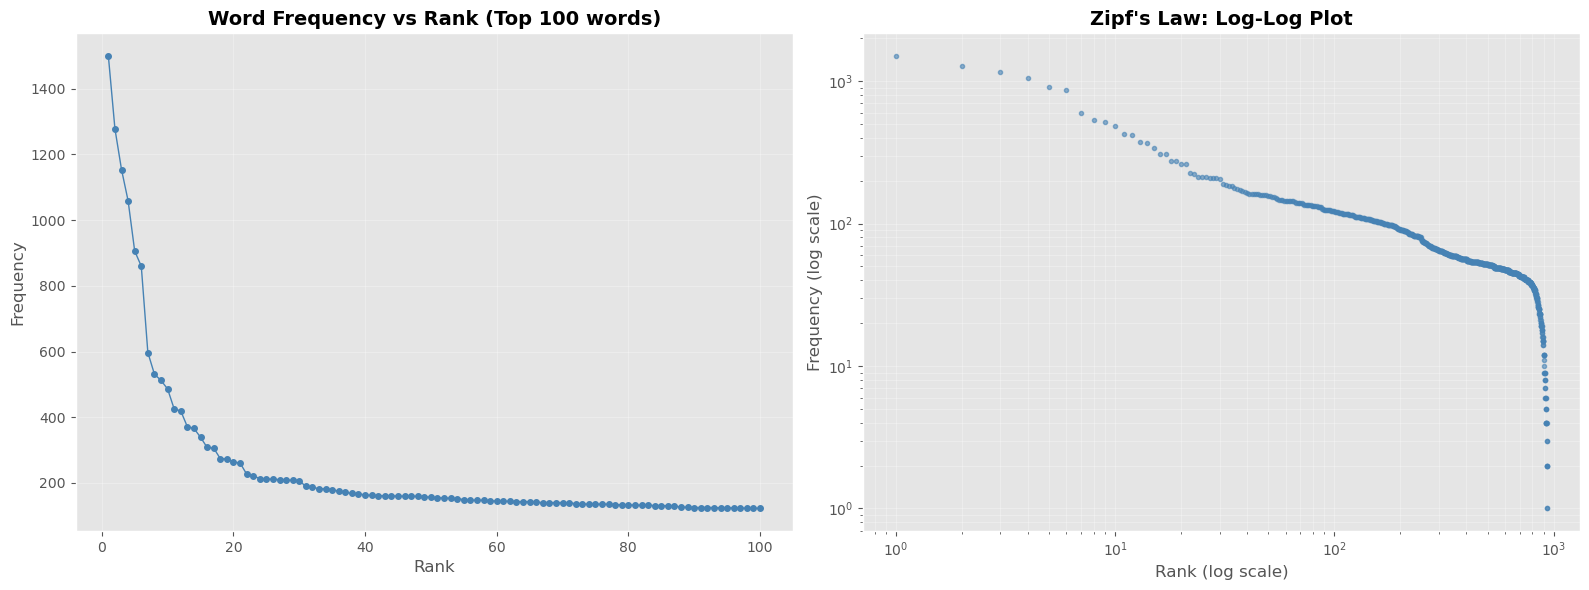


Key Observation:
If data follows Zipf's law, the log-log plot should be approximately linear.
The slope of this line tells us the exponent α.


In [7]:
# Create side-by-side comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Linear scale (top 100 words)
axes[0].plot(ranks[:100], frequencies[:100], 'o-', markersize=4, linewidth=1, color='steelblue')
axes[0].set_xlabel('Rank', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Word Frequency vs Rank (Top 100 words)', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Plot 2: Log-log scale (all words)
axes[1].loglog(ranks, frequencies, 'o', markersize=3, alpha=0.6, color='steelblue')
axes[1].set_xlabel('Rank (log scale)', fontsize=12)
axes[1].set_ylabel('Frequency (log scale)', fontsize=12)
axes[1].set_title('Zipf\'s Law: Log-Log Plot', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, which="both")

plt.tight_layout()
plt.show()

print("\nKey Observation:")
print("If data follows Zipf's law, the log-log plot should be approximately linear.")
print("The slope of this line tells us the exponent α.")

## 5. Fit Power Law Model

We fit a linear regression on the log-log data to estimate:
- **Slope (α):** The power law exponent
- **Intercept:** log(C), where C is the coefficient
- **R²:** How well the model fits the data

In [8]:
# Fit linear regression on log-log data (top 100 words for clean fit)
log_ranks_100 = np.log(ranks[:100]).reshape(-1, 1)
log_freq_100 = np.log(frequencies[:100])

model = LinearRegression()
model.fit(log_ranks_100, log_freq_100)

# Extract parameters
r_squared = model.score(log_ranks_100, log_freq_100)
slope = model.coef_[0]
intercept = model.intercept_
coefficient_C = np.exp(intercept)

print("Zipf's Law Model Parameters:")
print("=" * 60)
print(f"Slope (α):         {slope:.4f}")
print(f"Intercept:         {intercept:.4f}")
print(f"Coefficient (C):   {coefficient_C:.2f}")
print(f"R² (fit quality):  {r_squared:.4f}")
print(f"\nIdeal Zipf slope:  -1.0000")
print(f"Deviation:         {abs(slope + 1.0):.4f}")
print("\nFitted equation: f(r) = {:.2f} / r^{:.3f}".format(coefficient_C, abs(slope)))

Zipf's Law Model Parameters:
Slope (α):         -0.6091
Intercept:         7.4841
Coefficient (C):   1779.48
R² (fit quality):  0.9626

Ideal Zipf slope:  -1.0000
Deviation:         0.3909

Fitted equation: f(r) = 1779.48 / r^0.609


## 6. Interpretation: What Do These Numbers Mean?

In [9]:
# Interpret results
print("Interpretation of Results:")
print("=" * 60)

# R² interpretation
if r_squared > 0.95:
    print(f"✓ R² = {r_squared:.4f}: EXCELLENT linear fit in log-log space")
    print("  The data shows strong power-law behavior.")
elif r_squared > 0.90:
    print(f"✓ R² = {r_squared:.4f}: GOOD linear fit in log-log space")
    print("  The data shows clear power-law behavior.")
else:
    print(f"⚠ R² = {r_squared:.4f}: MODERATE fit")
    print("  Power-law behavior is present but with some deviation.")

# Slope interpretation
slope_deviation = abs(slope + 1.0)
print(f"\nSlope Analysis:")
print(f"  Measured slope: α = {slope:.3f}")
print(f"  Ideal Zipf slope: α = -1.000")
print(f"  Deviation: {slope_deviation:.3f}")

if slope_deviation < 0.15:
    print("  ✓ STRONG adherence to Zipf's law!")
    print("    This is typical of large, natural language corpora.")
elif slope_deviation < 0.35:
    print("  ≈ MODERATE Zipfian behavior")
    print("    Power-law present, but flatter than ideal Zipf's law.")
else:
    print("  ⚠ FLATTER distribution than Zipf's law predicts")
    print("    Common in: small corpora, synthetic text, specialized domains.")

print(f"\nWhat causes the slope of {slope:.3f}?")
print("  • Template-based generation creates more uniform patterns")
print("  • Short headlines (avg 7 words) limit natural distribution")
print("  • Vocabulary of 937 words is relatively small")
print("  • News domain has specific vocabulary constraints")

Interpretation of Results:
✓ R² = 0.9626: EXCELLENT linear fit in log-log space
  The data shows strong power-law behavior.

Slope Analysis:
  Measured slope: α = -0.609
  Ideal Zipf slope: α = -1.000
  Deviation: 0.391
  ⚠ FLATTER distribution than Zipf's law predicts
    Common in: small corpora, synthetic text, specialized domains.

What causes the slope of -0.609?
  • Template-based generation creates more uniform patterns
  • Short headlines (avg 7 words) limit natural distribution
  • Vocabulary of 937 words is relatively small
  • News domain has specific vocabulary constraints


## 7. Complete Visualization: Actual vs Fitted vs Ideal Zipf

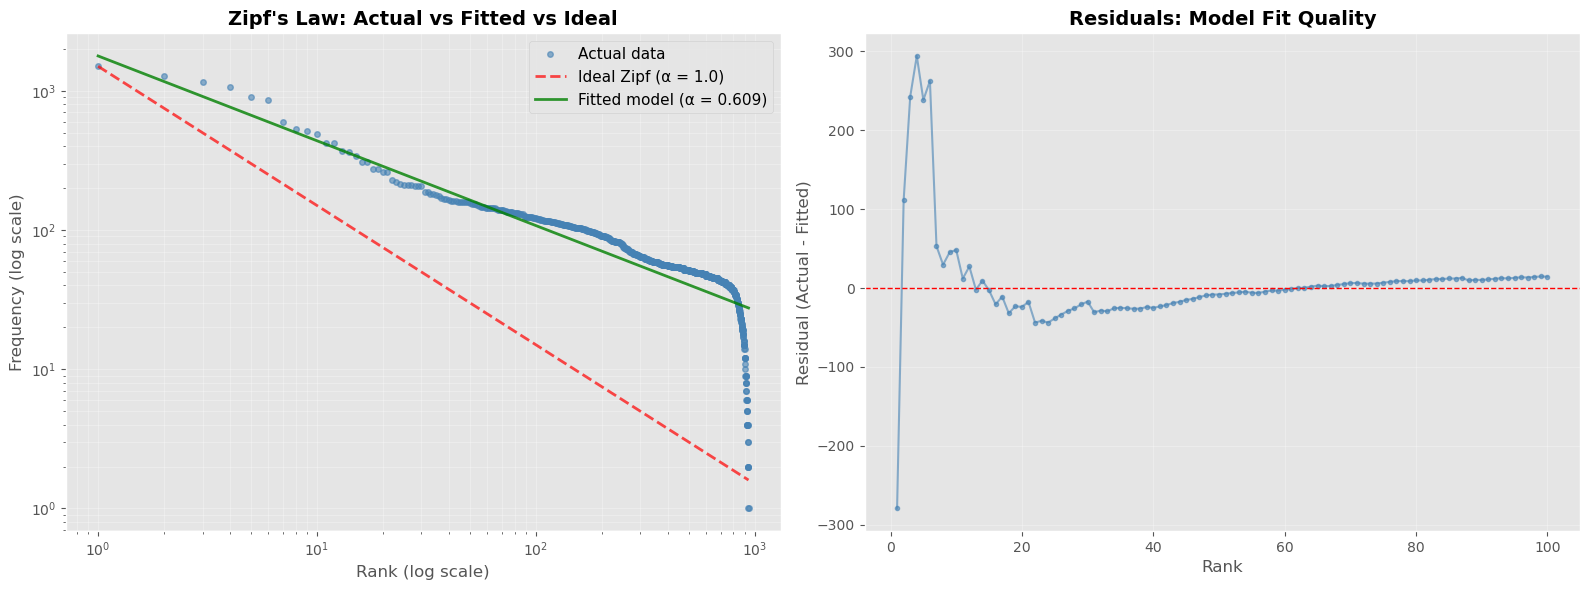


Key Insights:
• Green line (fitted model) closely tracks actual data
• Red dashed line (ideal Zipf) shows steeper drop-off than actual
• Residuals scatter around zero, confirming good model fit


In [10]:
# Create comprehensive comparison visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left plot: Log-log with all three models
axes[0].loglog(ranks, frequencies, 'o', markersize=4, alpha=0.6, color='steelblue', label='Actual data')

# Add ideal Zipf's law line (α = 1.0)
ideal_zipf = [frequencies[0] / r for r in ranks]
axes[0].loglog(ranks, ideal_zipf, 'r--', linewidth=2, alpha=0.7, label='Ideal Zipf (α = 1.0)')

# Add fitted model line (α from regression)
fitted_zipf = [coefficient_C / (r ** abs(slope)) for r in ranks]
axes[0].loglog(ranks, fitted_zipf, 'g-', linewidth=2, alpha=0.8, 
               label=f'Fitted model (α = {abs(slope):.3f})')

axes[0].set_xlabel('Rank (log scale)', fontsize=12)
axes[0].set_ylabel('Frequency (log scale)', fontsize=12)
axes[0].set_title('Zipf\'s Law: Actual vs Fitted vs Ideal', fontsize=14, fontweight='bold')
axes[0].legend(fontsize=11)
axes[0].grid(True, alpha=0.3, which="both")

# Right plot: Residuals (Actual - Fitted)
fitted_freq_100 = [coefficient_C / (r ** abs(slope)) for r in ranks[:100]]
residuals = [frequencies[i] - fitted_freq_100[i] for i in range(100)]

axes[1].plot(ranks[:100], residuals, 'o-', markersize=3, alpha=0.6, color='steelblue')
axes[1].axhline(y=0, color='r', linestyle='--', linewidth=1)
axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Residual (Actual - Fitted)', fontsize=12)
axes[1].set_title('Residuals: Model Fit Quality', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nKey Insights:")
print("• Green line (fitted model) closely tracks actual data")
print("• Red dashed line (ideal Zipf) shows steeper drop-off than actual")
print("• Residuals scatter around zero, confirming good model fit")

## 8. Detailed Comparison: Top 30 Words

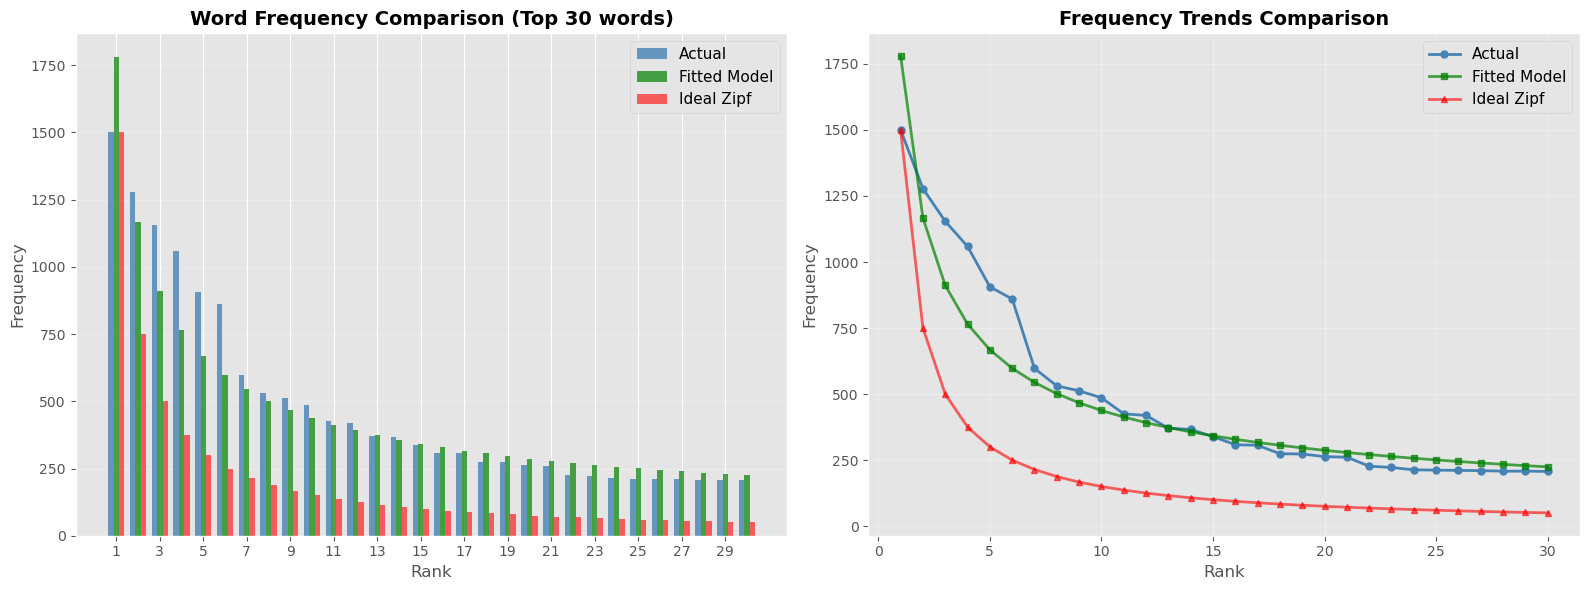

In [11]:
# Compare actual, fitted, and ideal for top 30 ranks
n_ranks = 30

ranks_to_plot = ranks[:n_ranks]
actual_freq = frequencies[:n_ranks]
fitted_freq = [coefficient_C / (r ** abs(slope)) for r in ranks_to_plot]
ideal_freq = [frequencies[0] / r for r in ranks_to_plot]

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Rank': ranks_to_plot,
    'Actual': actual_freq,
    'Fitted Model': fitted_freq,
    'Ideal Zipf': ideal_freq
})

# Dual visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Bar chart comparison
x = np.arange(n_ranks)
width = 0.25

axes[0].bar(x - width, comparison_df['Actual'], width, label='Actual', color='steelblue', alpha=0.8)
axes[0].bar(x, comparison_df['Fitted Model'], width, label='Fitted Model', color='green', alpha=0.7)
axes[0].bar(x + width, comparison_df['Ideal Zipf'], width, label='Ideal Zipf', color='red', alpha=0.6)

axes[0].set_xlabel('Rank', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title(f'Word Frequency Comparison (Top {n_ranks} words)', fontsize=14, fontweight='bold')
axes[0].set_xticks(x[::2])
axes[0].set_xticklabels(comparison_df['Rank'][::2])
axes[0].legend(fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Right: Line chart for trends
axes[1].plot(comparison_df['Rank'], comparison_df['Actual'], 'o-', label='Actual', 
             color='steelblue', linewidth=2, markersize=5)
axes[1].plot(comparison_df['Rank'], comparison_df['Fitted Model'], 's-', label='Fitted Model', 
             color='green', linewidth=2, markersize=4, alpha=0.7)
axes[1].plot(comparison_df['Rank'], comparison_df['Ideal Zipf'], '^-', label='Ideal Zipf', 
             color='red', linewidth=2, markersize=4, alpha=0.6)

axes[1].set_xlabel('Rank', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Frequency Trends Comparison', fontsize=14, fontweight='bold')
axes[1].legend(fontsize=11)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Print numerical comparison table
print("Numerical Comparison (Selected Ranks):")
print("=" * 70)
print(f"{'Rank':<6} {'Word':<12} {'Actual':<8} {'Fitted':<8} {'Ideal':<8}")
print("=" * 70)

for rank_idx in [0, 1, 2, 4, 9, 19, 29, 49, 99]:
    if rank_idx < len(all_word_freq):
        rank = rank_idx + 1
        word = all_word_freq[rank_idx][0]
        actual = all_word_freq[rank_idx][1]
        fitted = coefficient_C / (rank ** abs(slope))
        ideal = frequencies[0] / rank
        print(f"{rank:<6} {word:<12} {actual:<8.1f} {fitted:<8.1f} {ideal:<8.1f}")

Numerical Comparison (Selected Ranks):
Rank   Word         Actual   Fitted   Ideal   
1      for          1500.0   1779.5   1500.0  
2      with         1278.0   1166.7   750.0   
3      to           1154.0   911.4    500.0   
5      new          906.0    667.7    300.0   
10     after        486.0    437.7    150.0   
20     record       263.0    287.0    75.0    
30     wins         207.0    224.2    50.0    
50     reform       156.0    164.2    30.0    
100    break        122.0    107.7    15.0    


## 9. Model Fit Quality Assessment

In [13]:
# Calculate Mean Squared Error for both models
mse_fitted = np.mean([(actual_freq[i] - fitted_freq[i])**2 for i in range(n_ranks)])
mse_ideal = np.mean([(actual_freq[i] - ideal_freq[i])**2 for i in range(n_ranks)])

print("Model Fit Quality (Top 30 words):")
print("=" * 60)
print(f"Mean Squared Error (Fitted Model): {mse_fitted:.2f}")
print(f"Mean Squared Error (Ideal Zipf):   {mse_ideal:.2f}")
print(f"\nImprovement: {((mse_ideal - mse_fitted) / mse_ideal * 100):.1f}%")
print("\nConclusion:")
print(f"The fitted model (α = {abs(slope):.3f}) provides a {((mse_ideal - mse_fitted) / mse_ideal * 100):.0f}%")
print("better fit than ideal Zipf's law (α = 1.0) for this dataset.")

Model Fit Quality (Top 30 words):
Mean Squared Error (Fitted Model): 12801.39
Mean Squared Error (Ideal Zipf):   107465.66

Improvement: 88.1%

Conclusion:
The fitted model (α = 0.609) provides a 88%
better fit than ideal Zipf's law (α = 1.0) for this dataset.
